In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import sys
import math
import pickle

# Iterative


tau =  0.05 alpha =  0.01

tau =  0.1 alpha =  0.01

tau =  0.2 alpha =  0.01

tau =  0.4 alpha =  0.01

tau =  0.6 alpha =  0.01
sr_array =  [[0.78 0.88 0.89 0.83 0.7 ]
 [0.89 0.94 0.96 0.88 0.78]
 [0.92 0.97 0.99 0.91 0.82]]
ar_array =  [0.99113628 0.99661714 0.99751693 0.99398891 0.98458413]


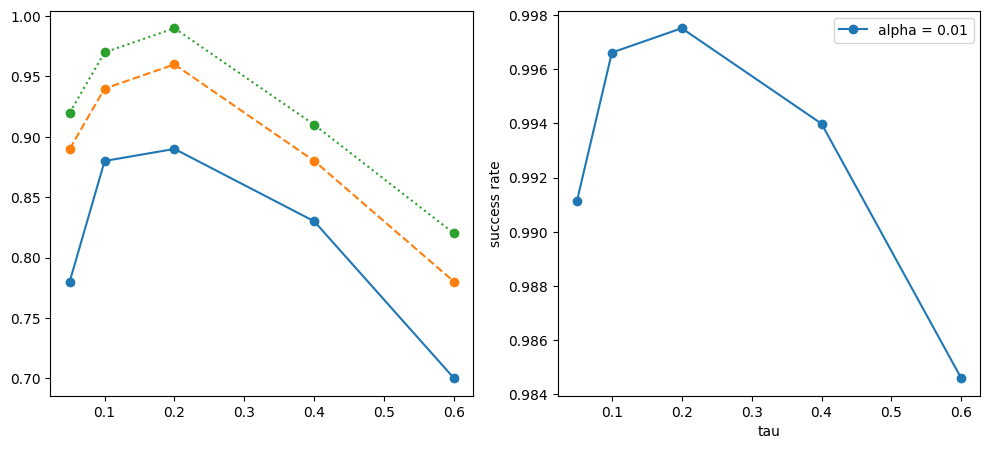

In [36]:
N=20
r_list = range(100)
tau_list = [0.05, 0.1, 0.2, 0.4, 0.6]
alpha_list = [0.01]

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
for alpha in alpha_list:
    sr_array = np.zeros((len(num_opt_list), len(tau_list)))
    ar_array = np.zeros(len(tau_list))
    for taui, tau in enumerate(tau_list):
        print("\ntau = ", tau, "alpha = ", alpha)
        for r in r_list:
            filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
            with open(filename, 'rb') as f:
                data = pickle.load(f)
            params_list = data["params_list"]
            if len(params_list) != round(N**2):
                print("error N, r = ", r, len(params_list))
            steps_exp_poss_dict = data["steps_exp_poss_dict"]
            steps_cvar_dict = data["steps_cvar_dict"]
            
            final_exp_poss = steps_exp_poss_dict["step_5"]["l_1"]
            poss_list = list(final_exp_poss.values())
            if poss_list[0] > alpha:
                sr_array[0, taui] += 1/len(r_list)
            if sum(poss_list[:2]) > alpha:
                sr_array[1, taui] += 1/len(r_list)
            if sum(poss_list[:3]) > alpha:
                sr_array[2, taui] += 1/len(r_list)

            exp_opt = list(final_exp_poss.keys())[0]
            cvar = steps_cvar_dict["step_9"]
            ar_array[taui] += (cvar/exp_opt) / len(r_list)

    print("sr_array = ", sr_array)
    ax1.plot(tau_list, sr_array[0], "o-", label=f"alpha = {alpha}, num_opt = 1")
    ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(tau_list, ar_array, "o-", label=f"alpha = {alpha}")
    print("ar_array = ", ar_array)
plt.legend()
plt.xlabel("tau")
plt.ylabel("success rate")
plt.show()



# lightcone, block

In [13]:
# N = 12
# r = 0
# ws_method_list = ['single_term', 'lightcone', 'block']
# numpara = 2
# tau_list = [0.2, 0.4, 0.6, 0.8]

# for tau in tau_list:
#     print('\n##################################################')
#     print('tau = {}'.format(tau))
#     for ws_method in ws_method_list:
#         ### folder to save result
#         data_dir = './data/N_{}/r_{}/{}/'.format(N, r, ws_method)
#         file_path = data_dir + 'numpara_{}_tau_{}.pkl'.format(numpara, tau)

#         print('\nws_method = {}, numpara = {}, tau = {}'.format(ws_method, numpara, tau))

#         with open(file_path, 'rb') as f:
#             data = pickle.load(f)
#             exp_poss_dict = data['exp_poss_dict']
#         print(exp_poss_dict)


##################################################
tau = 0.2

ws_method = single_term, numpara = 2, tau = 0.2
[(-14.369499999999993, 0.008732197599281474), (-13.974299999999998, 0.008380609703501614), (-13.632899999999994, 0.0073243594070633985), (-13.370299999999999, 0.006990292613804793), (-13.365299999999996, 0.005271962670515151), (-13.350500000000002, 0.005538932538163851), (-13.328900000000003, 0.007421430182478861), (-13.275699999999995, 0.005270420601309943), (-13.188099999999997, 0.00565901037963077), (-13.056299999999998, 0.006510501624159358), (-13.055099999999998, 0.0048409347466801395), (-12.9075, 0.005323756180856335), (-12.897500000000003, 0.008646231013130017), (-12.879099999999996, 0.005788156704104685), (-12.557699999999995, 0.0045147331924094035), (-12.364500000000001, 0.0062160492460498935), (-12.329699999999995, 0.004829883979776899), (-12.251700000000001, 0.005489586783222566), (-11.988899999999997, 0.0031604563638099495), (-11.975299999999999, 0.0057368263749456